### Libraries

In [2]:
from sklearn.datasets import load_diabetes # loading sklearn for diabetes dataset
import pandas as pd # importing pandas for data operation 
import seaborn as sns # import seaborn for visualization
import matplotlib.pyplot as plt # import matplotlib for visualization

### Loading data

In [ ]:
df = load_diabetes(return_X_y=False, as_frame=False, scaled=False) # loading dataset
df_data = pd.DataFrame(df.data,columns=df.feature_names) # feature data
df_data.rename(columns={'s1':'tc','s2':'ldl','s3':'hdl','s4':'tch','s5':'ltg','s6':'glu'},inplace=True) # changing columns name for convenience
df_target = pd.DataFrame(df.target) # target variable
df_target.rename(columns={0:'bg'}, inplace =True) # changing column name for convenience
df_main = pd.concat([df_data,df_target],axis=1) # concatenating feature and target dataset
df_main
num_data = df_data.drop('sex',axis=1) # dataset which exclude 'sex' column.

{'data': array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
       [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
       [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
       [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
       [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,

In [4]:
df_main['sex'].replace(1.0, 'Female', inplace=True) # taking 1 as Female
df_main['sex'].replace(2.0, 'Male', inplace=True) # taking 2 as Male

In [5]:
df_main 

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
0,59.0,Male,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,Female,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,Male,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,Female,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,Female,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,Male,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,Male,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,Male,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,Female,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [6]:
num_data

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,59.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...
437,60.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


### EDA

In [7]:
num_data.corr() # checking correlation between features

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu
age,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
bmi,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
tc,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
ldl,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
hdl,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
tch,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
ltg,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
glu,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

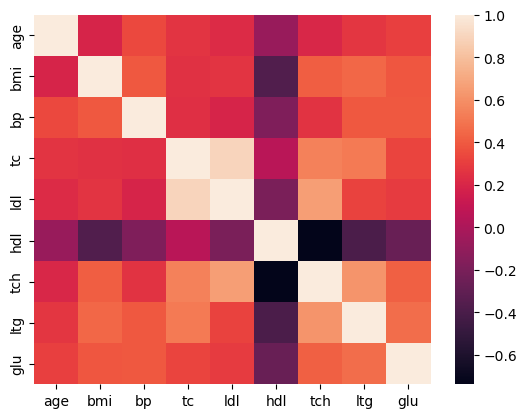

In [8]:
sns.heatmap(num_data.corr()) # Heatmap visualization on dataset 

In [9]:
num_data.describe() # description of the data

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


* columns age, bp and itg columns are outlier free

### There are 3 outliers observed in the BMI column, the data generally shows a strong positive correlation between higher BMI and an increased risk of diabetes progression within one year.

### Total cholostrol and ldl(bad cholostrol) has highly correlation also the outliers for both features has similar patient. 

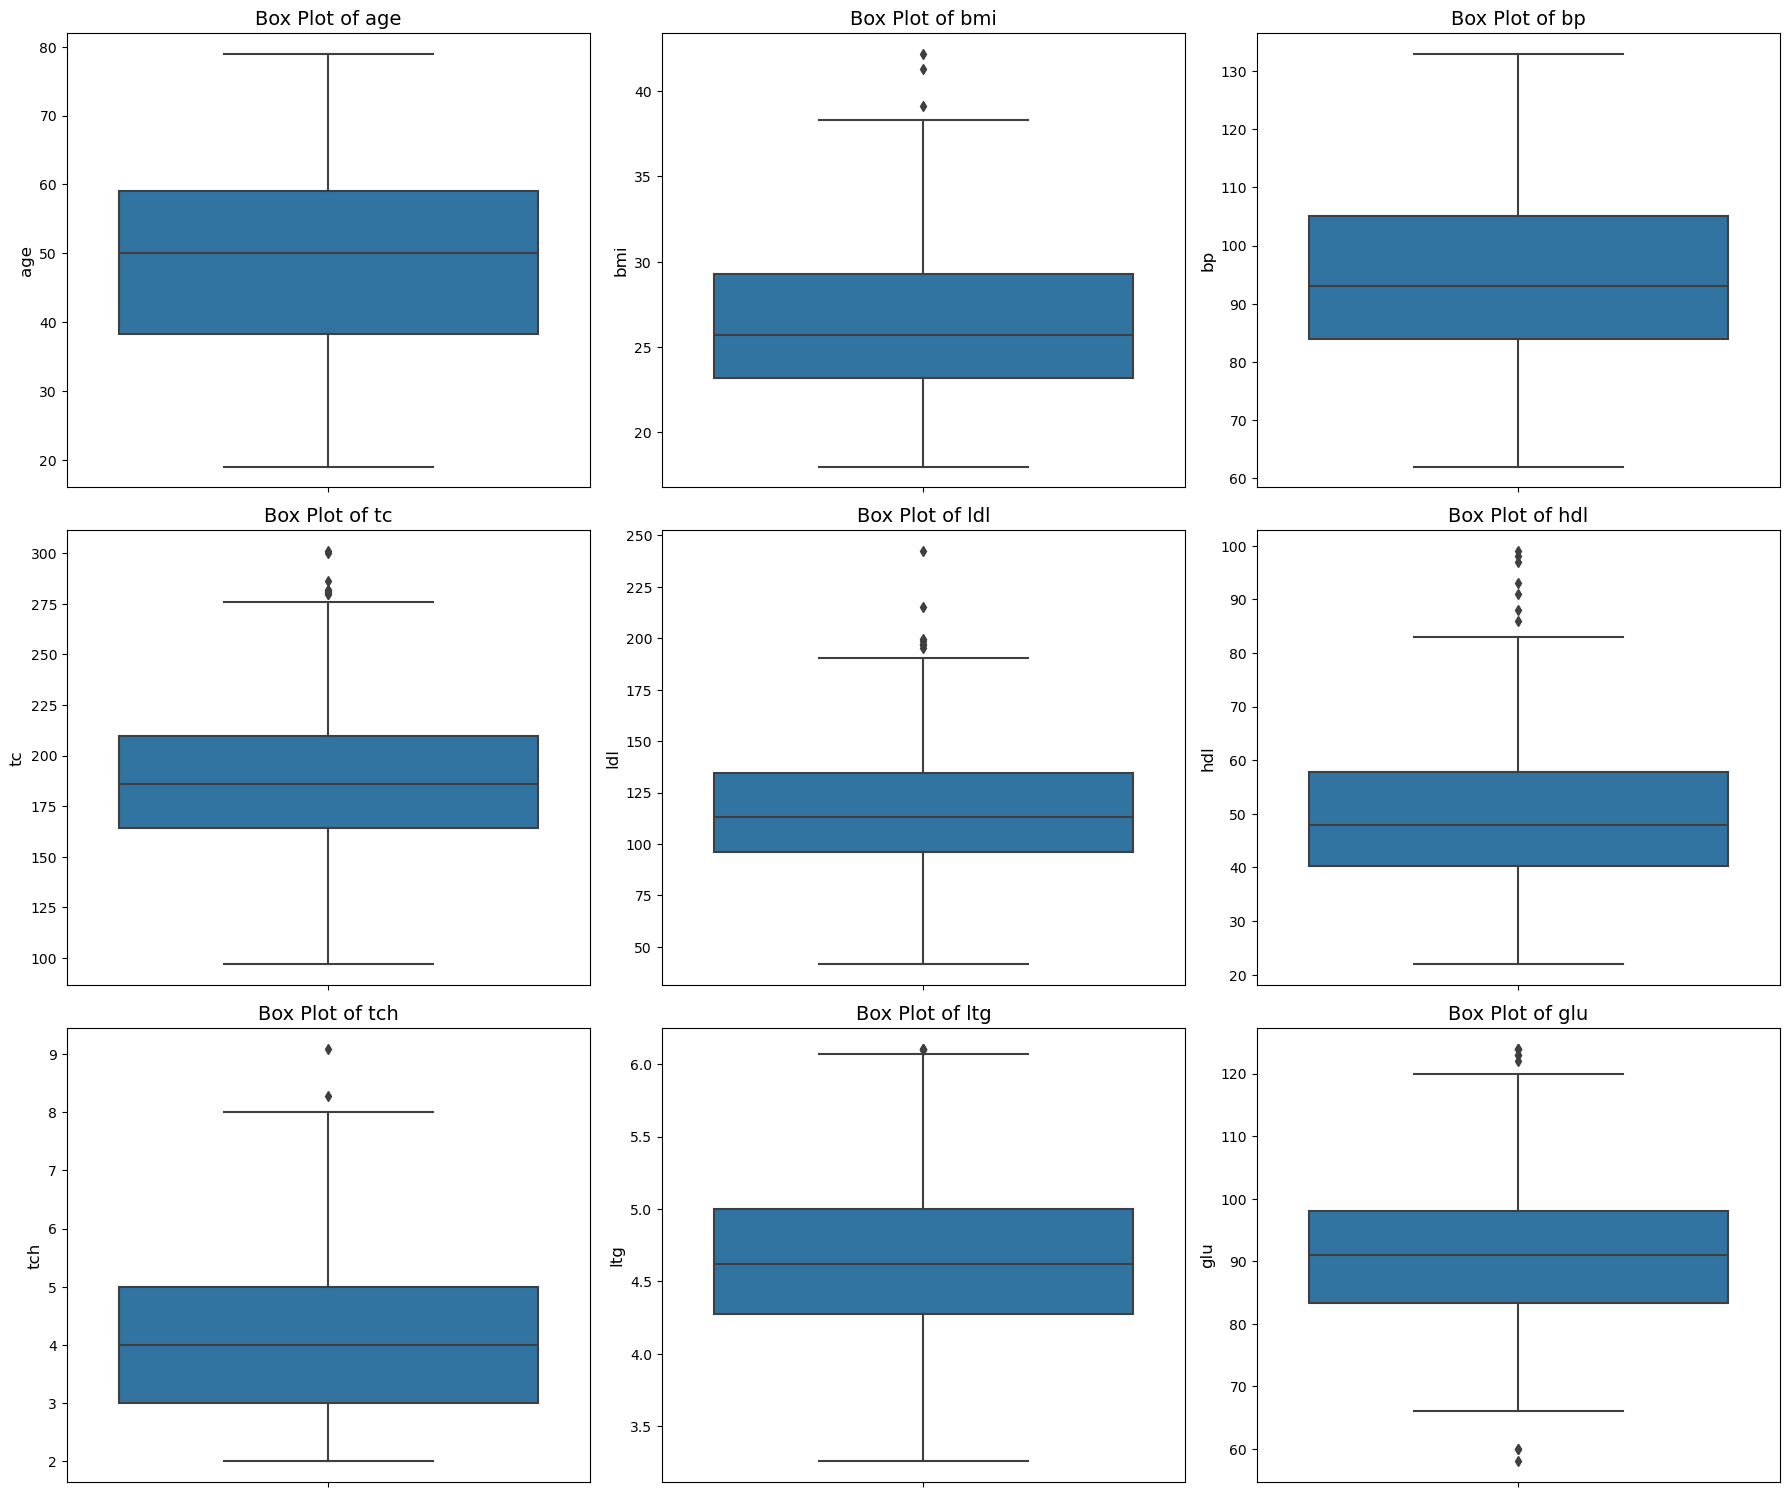

In [13]:
num_cols = 3 # number of columns in subplot
num_rows = 4 # number of rows in subplot
name_cols = num_data.columns # names of the columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows)) 
axes = axes.flatten()
for i, col in enumerate(name_cols):
    sns.boxplot(y=num_data[col], ax=axes[i])
    axes[i].set_ylabel(col,size=12) # ylabel for each plot
    axes[i].set_title(f'Box Plot of {col}',size=14) # title of each plot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) # just to beautify the plots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'progressive bg in 1 yr')

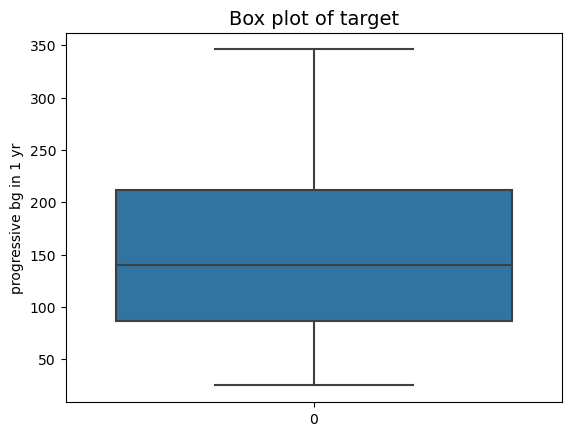

In [14]:
plt.title("Box plot of target",size=14)
sns.boxplot(df_main['bg'])
plt.ylabel("progressive bg in 1 yr")

In [68]:
def outlier(column):
    Q1 = df_main[column].quantile(0.25)
    Q3 = df_main[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_main[(df_main[column] < lower_bound) | (df_main[column] > upper_bound)]
    return outliers

In [69]:
outlier('bmi')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
256,35.0,Female,41.3,81.0,168.0,102.8,37.0,5.0,4.9488,94.0,346.0
366,36.0,Male,39.1,90.0,219.0,135.8,38.0,6.0,5.4205,103.0,233.0
367,46.0,Male,42.2,99.0,211.0,137.0,44.0,5.0,5.0106,99.0,242.0


In [70]:
df_main[df_main['bmi']>35] # data for bmi greater than 35

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
32,58.0,Male,38.0,103.0,150.0,107.2,22.0,7.00,4.6444,98.0,341.0
114,55.0,Female,36.6,113.0,199.0,94.4,43.0,4.63,5.7301,97.0,258.0
130,31.0,Male,35.3,125.0,187.0,112.4,48.0,4.00,4.8903,109.0,274.0
138,58.0,Male,36.7,117.0,166.0,93.8,44.0,4.00,4.9488,109.0,336.0
145,37.0,Female,38.3,113.0,165.0,94.6,53.0,3.00,4.4659,79.0,259.0
215,56.0,Male,35.1,123.0,164.0,95.0,38.0,4.00,5.0434,117.0,263.0
251,34.0,Male,35.5,120.0,233.0,146.6,34.0,7.00,5.5683,101.0,243.0
256,35.0,Female,41.3,81.0,168.0,102.8,37.0,5.00,4.9488,94.0,346.0
262,44.0,Male,38.2,123.0,201.0,126.6,44.0,5.00,5.0239,92.0,308.0
327,69.0,Female,37.0,103.0,207.0,131.4,55.0,4.00,4.6347,90.0,237.0


In [71]:
outlier('tc')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
123,50.0,Male,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0,84.0
161,36.0,Male,32.3,115.00,286.0,199.4,39.0,7.00,5.4723,112.0,217.0
202,71.0,Male,26.5,105.00,281.0,173.6,55.0,5.00,5.5683,84.0,196.0
230,38.0,Male,33.0,78.00,301.0,215.0,50.0,6.02,5.1930,108.0,220.0
248,37.0,Female,30.8,112.00,282.0,197.2,43.0,7.00,5.3423,101.0,258.0
276,52.0,Female,28.8,113.00,280.0,174.0,67.0,4.00,5.2730,86.0,283.0
287,61.0,Female,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0,219.0
346,50.0,Male,28.0,104.00,282.0,196.8,44.0,6.00,5.3279,95.0,139.0


In [72]:
outlier('ldl')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
123,50.0,Male,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0,84.0
161,36.0,Male,32.3,115.00,286.0,199.4,39.0,7.00,5.4723,112.0,217.0
230,38.0,Male,33.0,78.00,301.0,215.0,50.0,6.02,5.1930,108.0,220.0
248,37.0,Female,30.8,112.00,282.0,197.2,43.0,7.00,5.3423,101.0,258.0
287,61.0,Female,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0,219.0
346,50.0,Male,28.0,104.00,282.0,196.8,44.0,6.00,5.3279,95.0,139.0
376,48.0,Female,32.7,93.00,276.0,198.6,43.0,6.42,5.1475,91.0,121.0


In [73]:
df_main[df_main['ldl']>190]

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
123,50.0,Male,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0,84.0
161,36.0,Male,32.3,115.00,286.0,199.4,39.0,7.00,5.4723,112.0,217.0
230,38.0,Male,33.0,78.00,301.0,215.0,50.0,6.02,5.1930,108.0,220.0
248,37.0,Female,30.8,112.00,282.0,197.2,43.0,7.00,5.3423,101.0,258.0
287,61.0,Female,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0,219.0
346,50.0,Male,28.0,104.00,282.0,196.8,44.0,6.00,5.3279,95.0,139.0
376,48.0,Female,32.7,93.00,276.0,198.6,43.0,6.42,5.1475,91.0,121.0
414,71.0,Male,27.0,93.33,269.0,190.2,41.0,6.56,5.2417,93.0,131.0


In [78]:
outlier('hdl')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
35,62.0,Male,23.5,80.33,225.0,112.8,86.0,2.62,4.8752,96.0,102.0
58,60.0,Female,20.4,105.00,198.0,78.4,99.0,2.00,4.6347,79.0,170.0
260,60.0,Female,25.6,78.00,195.0,95.4,91.0,2.00,3.7612,87.0,39.0
261,62.0,Female,22.5,125.00,215.0,99.0,98.0,2.00,4.4998,95.0,103.0
269,51.0,Female,23.4,87.00,220.0,108.8,93.0,2.00,4.5109,82.0,87.0
286,38.0,Female,21.3,72.00,165.0,60.2,88.0,2.00,4.4308,90.0,60.0
441,36.0,Female,19.6,71.00,250.0,133.2,97.0,3.00,4.5951,92.0,57.0


In [77]:
outlier('glu')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
23,61.0,Male,32.0,103.67,210.0,85.2,35.0,6.00,6.1070,124.0,245.0
84,49.0,Female,22.7,65.33,168.0,96.2,62.0,2.71,3.8918,60.0,65.0
117,65.0,Female,24.4,120.00,222.0,135.6,37.0,6.00,5.5094,124.0,281.0
141,41.0,Female,30.8,81.00,214.0,152.0,28.0,7.60,5.1358,123.0,317.0
168,49.0,Male,31.9,94.00,234.0,155.8,34.0,7.00,5.3982,122.0,268.0
245,41.0,Female,23.1,86.00,148.0,78.0,58.0,3.00,4.0943,60.0,125.0
350,41.0,Male,32.0,126.00,198.0,104.2,49.0,4.00,5.4116,124.0,243.0
406,33.0,Female,18.9,70.00,162.0,91.8,59.0,3.00,4.0254,58.0,72.0
428,62.0,Male,34.6,120.00,215.0,129.2,43.0,5.00,5.3660,123.0,310.0
